In [449]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib


In [450]:
df = pd.read_csv('bengaluru_house_prices.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [451]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

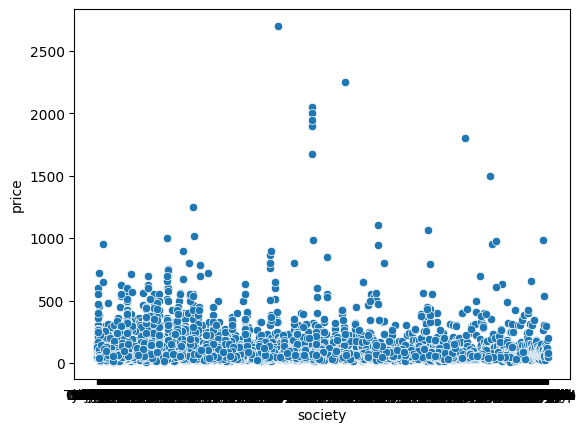

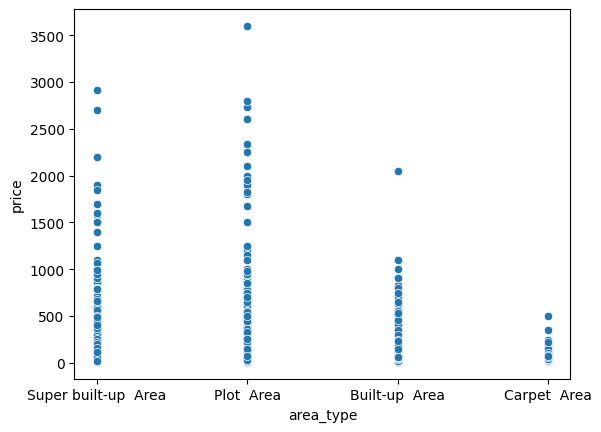

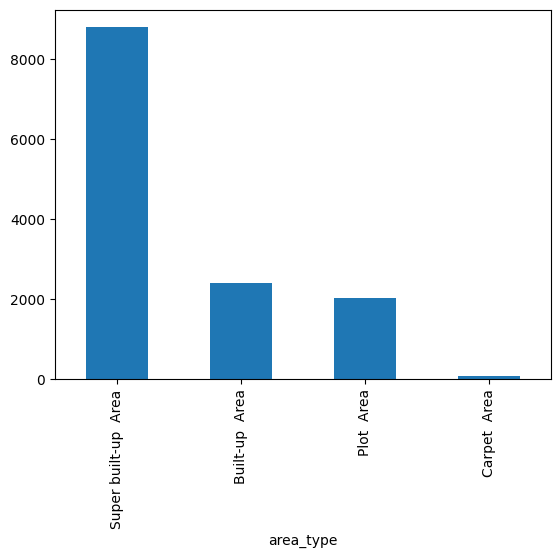

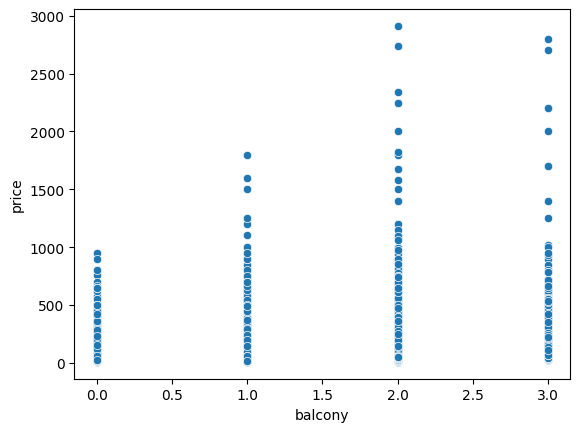

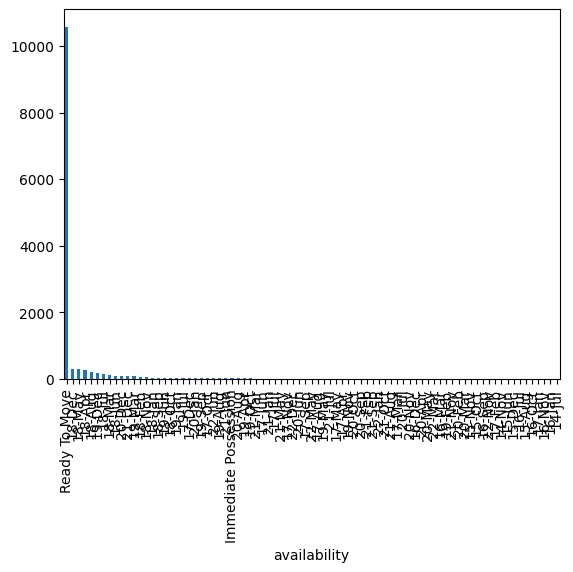

In [452]:
#We shall check if the society, area_type, balcony and availability has a relation with the price of the house
sns.scatterplot(x='society', y='price', data=df)
plt.show() #Concluded no relation between society and price

sns.scatterplot(x='area_type', y='price', data=df)
plt.show() #Super-build up area takes the mode but no proper conclusion
df['area_type'].value_counts().plot(kind='bar')
plt.show() #Conclued that the mode/mea/median for any area_type lies in the same region excluding a few outliers and different value_counts
#Hence society and area_type can be removed from the dataset

sns.scatterplot(x='balcony', y='price', data=df)
plt.show()

df['availability'].value_counts().plot(kind='bar')
plt.show() #Concluded that availability has no relation with the price of the house
#Most of the houses are ready to move so doesn't matter

In [453]:
df = df.drop(['area_type', 'society', 'balcony', 'availability'], axis=1)
df.isnull().sum() #Checking for null values again
df['size'].dropna(inplace=True) #Dropping null values in size
df['size'] = df['size'].astype(str) #Converting size to string

In [454]:
#Checking for all unique values and presence of wrong formatted values
for col in df.columns:
    print(col, df[col].unique(), df[col].nunique())
    print(df[col].dtype)
#size has many repeat values and some values in total sqft are given in range

location ['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur extension'
 'Abshot Layout'] 1305
object
size ['2 BHK' '4 Bedroom' '3 BHK' '4 BHK' '6 Bedroom' '3 Bedroom' '1 BHK'
 '1 RK' '1 Bedroom' '8 Bedroom' '2 Bedroom' '7 Bedroom' '5 BHK' '7 BHK'
 '6 BHK' '5 Bedroom' '11 BHK' '9 BHK' 'nan' '9 Bedroom' '27 BHK'
 '10 Bedroom' '11 Bedroom' '10 BHK' '19 BHK' '16 BHK' '43 Bedroom'
 '14 BHK' '8 BHK' '12 Bedroom' '13 BHK' '18 Bedroom'] 32
object
total_sqft ['1056' '2600' '1440' ... '1133 - 1384' '774' '4689'] 2117
object
bath [ 2.  5.  3.  4.  6.  1.  9. nan  8.  7. 11. 10. 14. 27. 12. 16. 40. 15.
 13. 18.] 19
float64
price [ 39.07 120.    62.   ...  40.14 231.   488.  ] 1994
float64


In [455]:
for item in df['size']: # Loop through each item in the 'size' column
    df['size'] = df['size'].replace(item, item.split(' ')[0])

In [456]:
def is_float(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

In [457]:
df['total_sqft'].dtypes

dtype('O')

In [458]:
def convert_to_float(value):
    if isinstance(value, str):
        if '-' in value:  # Check for range values
            parts = value.split('-')
            return (float(parts[0]) + float(parts[1])) / 2  # Return the average of the range
        elif is_float(value):  # Check if it's a float
            return float(value)
    return np.nan  # Return NaN for non-convertible values

In [459]:
df['total_sqft'] = df['total_sqft'].apply(convert_to_float)  # Apply the conversion function to the 'total_sqft' column
df['total_sqft'] = df['total_sqft'].astype(float)  # Convert the column to float type

In [460]:
df.head() #Checking the head of the dataframe after cleaning

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00


In [461]:
df['price_per_sqft'] = df['price']*100000 / df['total_sqft']  # Creating a new column for price per square foot
df.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [462]:
df['location'].value_counts() #checking briefly the range of locations count

location
Whitefield                         540
Sarjapur  Road                     399
Electronic City                    302
Kanakpura Road                     273
Thanisandra                        234
                                  ... 
3rd Stage Raja Rajeshwari Nagar      1
Chuchangatta Colony                  1
Electronic City Phase 1,             1
Chikbasavanapura                     1
Abshot Layout                        1
Name: count, Length: 1305, dtype: int64

In [463]:
local = df.groupby('location')['location'].agg('count').sort_values(ascending = False)

In [464]:
df['location'] = df['location'].apply(lambda x: 'other' if x in local[local<=10] else x)
len(df['location'].unique()) #remove too many categories thereby cleaning random locations

243

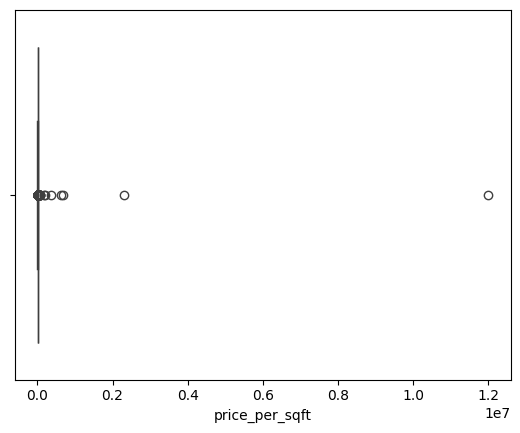

In [465]:
#To check outliers in price/sqft as there can be some data that is wrong
#Practical prices will only be taken
sns.boxplot(x=df['price_per_sqft'])
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1
#Removing all outliers in the dataset of price_per_sqft
lower_bound= Q1 - 1.5*IQR
upper_bound= Q3 + 1.5*IQR
df_mod = df[(df['price_per_sqft'] > lower_bound) & (df['price_per_sqft'] < upper_bound)]

<Axes: xlabel='price_per_sqft'>

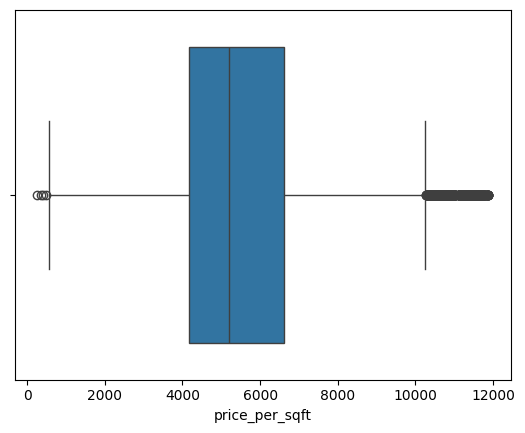

In [466]:
sns.boxplot(x=df_mod['price_per_sqft'])

In [467]:
df_mod['price_per_sqft'].describe()
#We are considering minimum price per sqft to be 1000 Rupees
df_mod = df_mod[df_mod['price_per_sqft']>1000]

In [468]:
#checking unique values
df_mod = df_mod[df_mod['size'] != 'nan']
df_mod['size'] =df_mod['size'].apply(lambda x: int(x))
df_mod['size'].unique() 


array([ 2,  4,  3,  1,  6,  8,  5,  7, 11,  9, 27, 10, 16, 14, 13])

In [469]:
#2 BHK flats in every area are supposed to be cheaper than 3 BHK
#We have to remove such outliers also
#Assuming like this and removing may remove necessary data so what we can do is
""" We can see the sqft per BHK and if it is less than 150 sqft per bedroom, like taking washroom and
hall balcony considered as minimum of 200 sqft and bhk*150"""

' We can see the sqft per BHK and if it is less than 150 sqft per bedroom, like taking washroom and\nhall balcony considered as minimum of 200 sqft and bhk*150'

In [470]:
df_mod = df_mod[(df_mod['total_sqft'] >= 200 + (df_mod['size'] * 140)) & (df_mod['total_sqft'] <= 1500 + df_mod['size'] * 1200)]
df_mod.shape

(11837, 6)

Text(0, 0.5, 'Count')

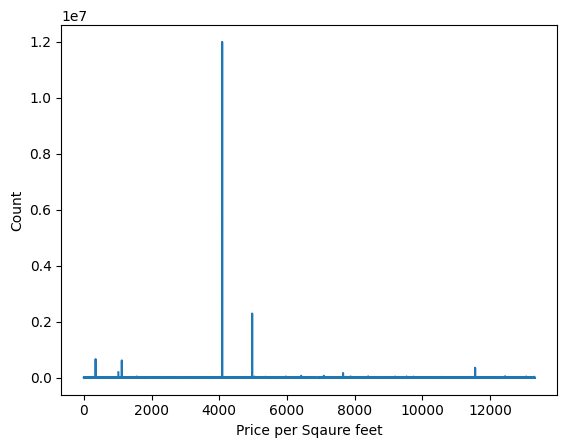

In [471]:
plt.plot(df['price_per_sqft'])
plt.xlabel('Price per Sqaure feet')
plt.ylabel('Count')

In [472]:
df_mod.shape #check the shape
df_mod.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


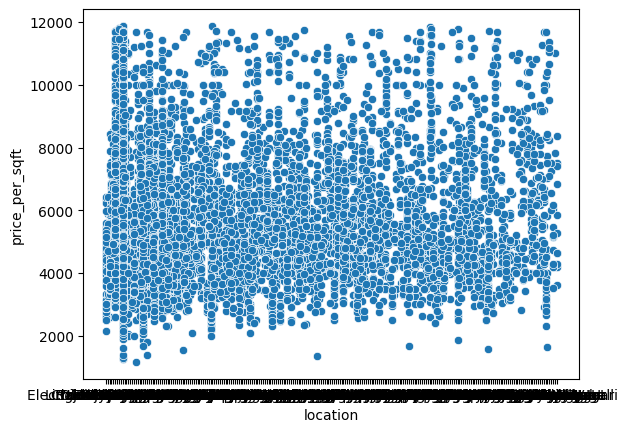

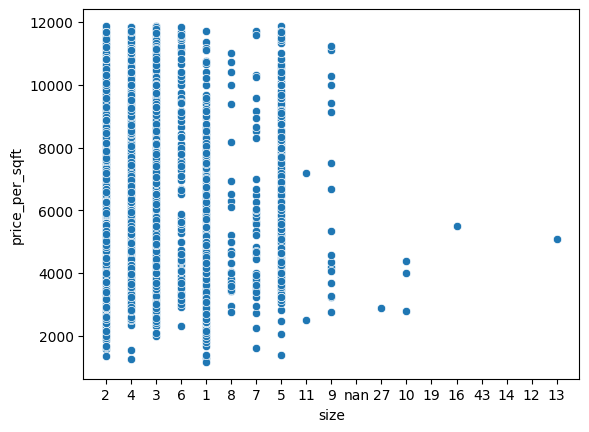

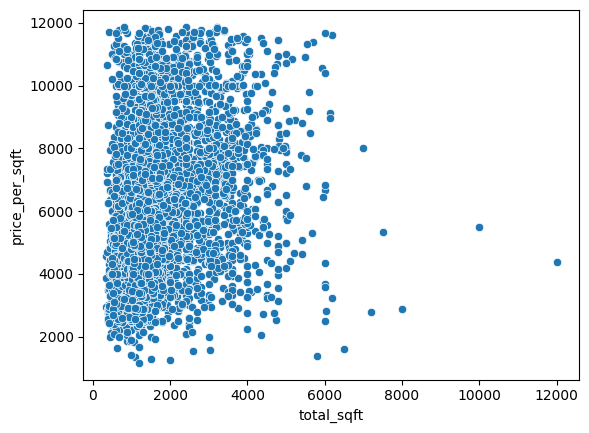

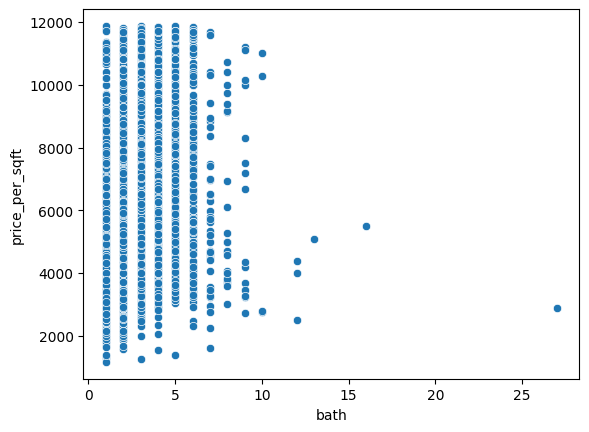

In [473]:
columns = ['location', 'size', 'total_sqft', 'bath']
for column in columns:
    sns.scatterplot(x=df[column], y=df_mod['price_per_sqft'])
    plt.show()
#Check the plot for all features
#NOTE: Not much relation between location and prices have been observed, likely that the locations are nearby or of the same tier
#We can ignore the location column for finding the model

In [474]:
d=df_mod.drop(columns='location')
d['bath'].fillna(d['bath'].mode()[0], inplace = True)

C:\Users\saisi\AppData\Local\Temp\ipykernel_66104\170479220.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  d['bath'].fillna(d['bath'].mode()[0], inplace = True)


In [475]:
X=d.iloc[:, :-1]
y=d.iloc[:, -1]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.9, random_state = 7)
"""Checked for test size 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, and all of them using random forest were result in a good accuracy score
of around 1 for train and 0.8 for test, the data is probably close and in a structured manner, hence the result
There is very slight but considerable overfitting therefore we can proceed with this model, this concludes my first project"""

'Checked for test size 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, and all of them using random forest were result in a good accuracy score\nof around 1 for train and 0.8 for test, the data is probably close and in a structured manner, hence the result\nThere is very slight but considerable overfitting therefore we can proceed with this model, this concludes my first project'

In [476]:
df_mod.isnull().sum()
df_mod['bath'].fillna(df_mod['bath'].mode()[0], inplace=True)

C:\Users\saisi\AppData\Local\Temp\ipykernel_66104\2773924915.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mod['bath'].fillna(df_mod['bath'].mode()[0], inplace=True)


In [477]:
df_mod.dropna()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000
...,...,...,...,...,...,...
13315,Whitefield,5,3453.0,4.0,231.00,6689.834926
13316,other,4,3600.0,5.0,400.00,11111.111111
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,60.00,5258.545136
13318,Padmanabhanagar,4,4689.0,4.0,488.00,10407.336319


In [478]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)
lr.score(X_train, Y_train), lr.score(X_test, Y_test)

(0.7884293936714183, 0.7935628349135312)

In [479]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, Y_train)
knn.score(X_train, Y_train), lr.score(X_test, Y_test)

(0.9544992430945117, 0.7935628349135312)

In [480]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10,random_state=42)
rf.fit(X_train, Y_train)
rf.score(X_train, Y_train), lr.score(X_test, Y_test)

(0.995078194378979, 0.7935628349135312)

In [481]:
from sklearn.metrics import mean_squared_error, r2_score
Y_pred = rf.predict(X_test)
print("MSE:", mean_squared_error(Y_test, Y_pred))
print("R2 Score:", r2_score(Y_test, Y_pred))

MSE: 97843.7777493347
R2 Score: 0.973370990323183
